# **Лабораторная работа №4**
## **Многомерная регрессия**
## **Вариант 6: Данные по заработной плате (Salary Data)**

**Цель работы**: изучение принципов решения задачи многомерной регрессии с использованием методов машинного обучения на языке Python.

В качестве объекта анализа используется датасет “Salary Data.csv”, содержащий сгенерированную информацию о сотрудниках компании и их заработной плате. Каждая запись представляет отдельного работника, а столбцы включают демографические параметры, сведения об образовании, профессиональный опыт и должность. Данные предназначены для решения задачи прогнозирования годовой заработной платы на основе нескольких факторов.

Набор данных включает следующие атрибуты:
*   Age – возраст сотрудника в годах.
*   Gender – пол сотрудника.
*   Education Level – уровень образования сотрудника (средняя школа, степень бакалавра, степень магистра или доктора философии).
*   Job Title – должность сотрудника. Должности могут различаться в зависимо-
сти от компании (менеджер, аналитик, инженер или администратор).
*   Years of Experience – количество лет работы сотрудника.
*   Salary – годовая зарплата сотрудника в долларах США.
в неделю, потраченных на физическую активность, в диапазоне от 0 до 10;



## Импортируем библиотеки и загружаем данные

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv("Salary Data.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


## Получим сводную информацию по датафрейму

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


## Проверим наличие пропущенных значений и выбросов

In [3]:
# проверяем на пропущенные значения
print(df.isnull().sum())

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64


## Заполняем числовые признаки средним а категориальные признаки модой

In [7]:
df_copy = df.copy()
df_copy['Age'] = df_copy['Age'].fillna(df_copy['Age'].mean())
df_copy['Years of Experience'] = df_copy['Years of Experience'].fillna(df_copy['Years of Experience'].mean())
df_copy['Salary'] = df_copy['Salary'].fillna(df_copy['Salary'].mean())

df_copy['Gender'] = df_copy['Gender'].fillna(df_copy['Gender'].mode()[0])
df_copy['Education Level'] = df_copy['Education Level'].fillna(df_copy['Education Level'].mode()[0])
df_copy['Job Title'] = df_copy['Job Title'].fillna(df_copy['Job Title'].mode()[0])


## Заменяем категориальные значения числовыми

In [14]:
for col in ['Gender', 'Education Level', 'Job Title']:
    unique, counts = np.unique(df_copy[col], return_counts=True)
    print(f'Unique values of {col}: {unique}')
    print(f'Counts: {counts}\n')

Unique values of Gender: [0 1]
Counts: [179 196]

Unique values of Education Level: [0 1 2]
Counts: [226  98  51]

Unique values of Job Title: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173]
Counts: [ 1  1  2  2  1  1  1  1  1  1  1  1  2  1  1  1  1  2  1  1  1  1  1  1
  2  2  1  1  2 14 11  1  1  1  2  1  1  1  1  2  2  1  1  1  1  1  2

In [15]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_copy['Gender'] = labelencoder.fit_transform(df_copy['Gender'])
df_copy['Education Level'] = labelencoder.fit_transform(df_copy['Education Level'])
df_copy['Job Title'] = labelencoder.fit_transform(df_copy['Job Title'])
df_copy.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0


## Разделяем данные на признаки и целевую переменную

In [16]:
# Целевая переменная
y = df_copy['Salary']

# Признаки
X = df_copy.drop('Salary', axis=1)

# Проверим типы данных
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [17]:
X.head()

,Age,Gender,Education Level,Job Title,Years of Experience
0,32.0,1,0,159,5.0
1,28.0,0,1,17,3.0
2,45.0,1,2,130,15.0
3,36.0,0,0,101,7.0
4,52.0,1,1,22,20.0


## Разделяем данные на обучающую и тестовую выборку

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Применяем операцию нормализации для численной устойчивости

In [20]:
# импортируем класс для стандартизации данных
from sklearn.preprocessing import StandardScaler
# и создания модели линейной регрессии
from sklearn.linear_model import LinearRegression

# создадим обхект класса StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

## Масштабируем признаки обучающей выборки

In [21]:
X_train_scaled = scaler.fit_transform(X_train)

# убедимся, что объект scaler запомнил значения среднего и СКО для каждого признака
scaler.mean_, scaler.scale_

(array([37.61517178,  0.52669039,  0.54448399, 91.00711744, 10.19239026]),
 array([ 6.970204  ,  0.49928711,  0.75386065, 46.34375602,  6.49722113]))

## Обучаем модель линейной регрессии

In [22]:
# применим масштабирование данные для обучения модели линейной регрессии
model = LinearRegression().fit(X_train_scaled, y_train)
model

LinearRegression()

## Делаем прогноз на основе данных тестирования

In [23]:
# преобразуем тестовые данные с использованием среднего и СКО, расчитанных на обучающей выборке
# так тестовые данные не повлияют на обучение модели, и мы избежим утечки данных
X_test_scaled = scaler.transform(X_test)

# сделаем прогноз на стандартизированных тестовых данных
y_pred = model.predict(X_test_scaled)
# выведем первые пять значений с помощью диапозона индексов
y_pred[:5]

array([ 60605.13075843, 102262.0353554 , 149394.98049494, 109872.52025485,
        84509.67863704])

In [24]:
# импортируем функцию корня среднеквадратической ошибки
from sklearn.metrics import root_mean_squared_error

# сравним тестовые и прогнозные значения
print('Root Mean Squared Error (RMSE):',
      root_mean_squared_error(y_test, y_pred))

Root Mean Squared Error (RMSE): 12445.638709514671


In [25]:
# посмотрим на еще одну метрику - коэффициент детерминации R2
from sklearn.metrics import r2_score
print('R2:', np.round(r2_score(y_test, y_pred), 2))

R2: 0.93


In [26]:
# оценим R-квадрат (метрика (score) по умолчанию для класса LinearRegression)
model.score(X_test_scaled, y_test)

0.9303596039975406

## Итоговое уравнение

In [27]:
# Коэффициенты
print ('Coefficients: ', model.coef_)

Coefficients:  [19059.33140793  4419.50459952 10166.65061145   818.96809715
 19783.50976044]


In [28]:
# Свободны член
print ('Intercept: ', model.intercept_)

Intercept:  101482.2231020961


## Оценим виляние признаков на целевую переменную

In [30]:
from sklearn.preprocessing import LabelEncoder
df_copy[['Gender','Education Level','Job Title']] = df_copy[['Gender','Education Level','Job Title']].apply(LabelEncoder().fit_transform)
df_copy.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0


In [32]:
df_copy.corr()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
Age,1.000000,-0.020274,0.561869,0.117093,0.979128,0.922335
Gender,-0.020274,1.000000,-0.048329,0.007532,0.002877,0.070931
Education Level,0.561869,-0.048329,1.000000,0.104495,0.589997,0.669389
Job Title,0.117093,0.007532,0.104495,1.000000,0.099706,0.135585
Years of Experience,0.979128,0.002877,0.589997,0.099706,1.000000,0.930338
Salary,0.922335,0.070931,0.669389,0.135585,0.930338,1.000000


## Визуализация результатов регрессии

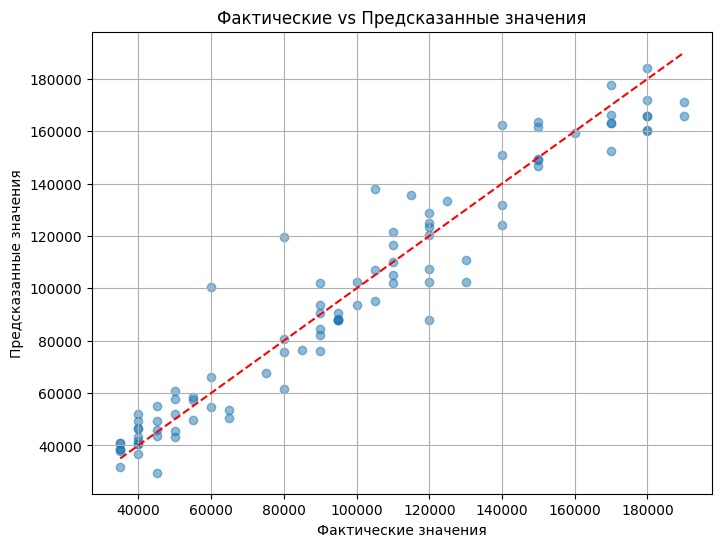

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Фактические vs Предсказанные значения")
plt.grid()
plt.show()

## Остатки регресиии (Residuals Plot)

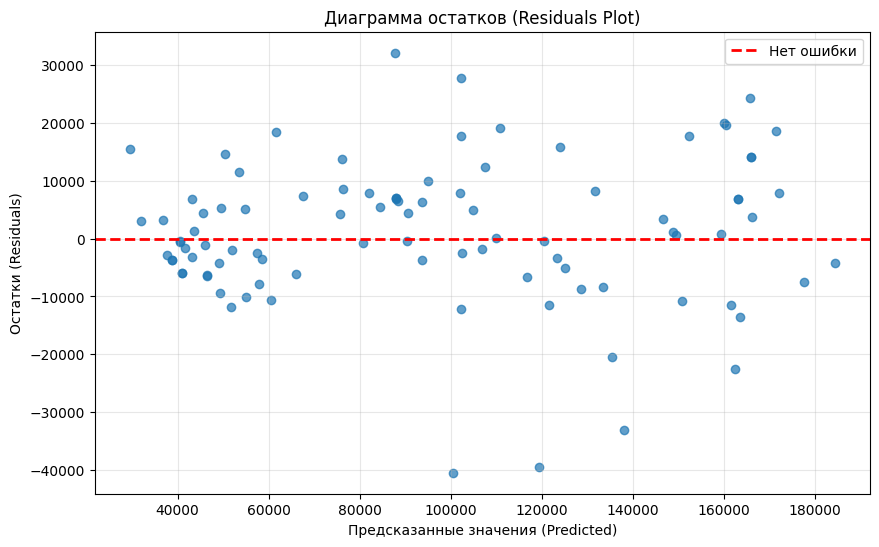

In [34]:
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Нет ошибки')
plt.xlabel("Предсказанные значения (Predicted)")
plt.ylabel("Остатки (Residuals)")
plt.title("Диаграмма остатков (Residuals Plot)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
